# **Carga de librerias y bases de datos**

Este análisis de datos pretende realizar una evaluación de la estrategia de marketing sobre el e-commerce de una compañia. Se trabajo con información proveniente de Kaggle conformada por 5 bases de datos:
 1. CustomersData
 2. Discount_Coupon
 3. Marketing_Spend
 4. Online_Sales
 5. Tax_amount

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.tsa.stattools import grangercausalitytests
import kagglehub
from kagglehub import KaggleDatasetAdapter

# **1. Exploración Base de datos Customer Data = Cliente**

In [ ]:
Cliente=pd.read_excel("CustomersData.xlsx")
Cliente.head()




,CustomerID,Gender,Location,Tenure_Months
0,17850,M,Chicago,12
1,13047,M,California,43
2,12583,M,Chicago,33
3,13748,F,California,30
4,15100,M,California,49


In [ ]:
Cliente.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     1468 non-null   int64 
 1   Gender         1468 non-null   object
 2   Location       1468 non-null   object
 3   Tenure_Months  1468 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 46.0+ KB


In [ ]:
Cliente.describe()

,CustomerID,Tenure_Months
count,1468.000000,1468.000000
mean,15314.386240,25.912125
std,1744.000367,13.959667
min,12346.000000,2.000000
25%,13830.500000,14.000000
50%,15300.000000,26.000000
75%,16882.250000,38.000000
max,18283.000000,50.000000


# **1.2 Exploración Base de datos Discount Coupon = Cupones**

In [ ]:
Cupones=pd.read_csv("Discount_Coupon.csv", sep=",")
Cupones.head()

,Month,Product_Category,Coupon_Code,Discount_pct
0,Jan,Apparel,SALE10,10
1,Feb,Apparel,SALE20,20
2,Mar,Apparel,SALE30,30
3,Jan,Nest-USA,ELEC10,10
4,Feb,Nest-USA,ELEC20,20


In [ ]:
Cupones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Month             204 non-null    Int64 
 1   Product_Category  204 non-null    object
 2   Coupon_Code       204 non-null    object
 3   Discount_pct      204 non-null    int64 
dtypes: Int64(1), int64(1), object(2)
memory usage: 6.7+ KB


In [ ]:
Cupones.describe()

,Discount_pct
count,204.000000
mean,20.000000
std,8.185052
min,10.000000
25%,10.000000
50%,20.000000
75%,30.000000
max,30.000000


# **1.3 Exploración Base de datos Marketing_spend = Gastos_marketing**

In [ ]:
Gastos_marketing=pd.read_csv("Marketing_Spend.csv", sep=",")
Gastos_marketing.head()

,Date,Offline_Spend,Online_Spend
0,1/1/2019,4500,2424.50
1,1/2/2019,4500,3480.36
2,1/3/2019,4500,1576.38
3,1/4/2019,4500,2928.55
4,1/5/2019,4500,4055.30


In [ ]:
Gastos_marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           365 non-null    object 
 1   Offline_Spend  365 non-null    int64  
 2   Online_Spend   365 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 8.7+ KB


In [ ]:
Gastos_marketing.describe()

,Offline_Spend,Online_Spend
count,365.000000,365.000000
mean,2843.561644,1905.880740
std,952.292448,808.856853
min,500.000000,320.250000
25%,2500.000000,1258.600000
50%,3000.000000,1881.940000
75%,3500.000000,2435.120000
max,5000.000000,4556.930000


# **1.4 Exploración Base de datos Onlines Sales = Ventas**

In [ ]:
Ventas=pd.read_csv("Online_Sales.csv", sep=",")
Ventas.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status
0,17850,16679,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used
1,17850,16680,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used
2,17850,16681,1/1/2019,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used
3,17850,16682,1/1/2019,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used
4,17850,16682,1/1/2019,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used


In [ ]:
Ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           52924 non-null  int64  
 1   Transaction_ID       52924 non-null  int64  
 2   Transaction_Date     52924 non-null  object 
 3   Product_SKU          52924 non-null  object 
 4   Product_Description  52924 non-null  object 
 5   Product_Category     52924 non-null  object 
 6   Quantity             52924 non-null  int64  
 7   Avg_Price            52924 non-null  float64
 8   Delivery_Charges     52924 non-null  float64
 9   Coupon_Status        52924 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 4.0+ MB


In [ ]:
Ventas.describe()

,CustomerID,Transaction_ID,Quantity,Avg_Price,Delivery_Charges
count,52924.00000,52924.000000,52924.000000,52924.000000,52924.000000
mean,15346.70981,32409.825675,4.497638,52.237646,10.517630
std,1766.55602,8648.668977,20.104711,64.006882,19.475613
min,12346.00000,16679.000000,1.000000,0.390000,0.000000
25%,13869.00000,25384.000000,1.000000,5.700000,6.000000
50%,15311.00000,32625.500000,1.000000,16.990000,6.000000
75%,16996.25000,39126.250000,2.000000,102.130000,6.500000
max,18283.00000,48497.000000,900.000000,355.740000,521.360000


# **2. Combinación de los dataframe Clientes y Ventas**

In [ ]:
# Clientes Con Ventas
Cliente = pd.read_excel("CustomersData.xlsx")
Ventas = pd.read_csv("Online_Sales.csv")

# Hacer el merge
df = Ventas.merge(Cliente, on="CustomerID", how="left")

In [ ]:
df.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Gender,Location,Tenure_Months
0,17850,16679,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,M,Chicago,12
1,17850,16680,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,M,Chicago,12
2,17850,16681,1/1/2019,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,M,Chicago,12
3,17850,16682,1/1/2019,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,M,Chicago,12
4,17850,16682,1/1/2019,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,M,Chicago,12


In [ ]:
print("Tipo de dato de la columna 'Month' en el DataFrame:")
print(Ventas['Month'].dtype)

print("\nTipo de dato de la columna 'Month' en el DataFrame:")
print(Cupones['Month'].dtype)

Tipo de dato de la columna 'Month' en el DataFrame:
int32

Tipo de dato de la columna 'Month' en el DataFrame:
Int64


In [ ]:
# Relacion de ventas y cupones
Ventas = pd.read_csv("Online_Sales.csv")
Cupones = pd.read_csv("Discount_Coupon.csv")
"""
Ventas['Transaction_Date'] = pd.to_datetime(Ventas['Transaction_Date'])
Ventas['Month'] = Ventas['Transaction_Date'].dt.month"""
Cupones['Month'] = Cupones['Month'].astype(str)
Ventas['Transaction_Date'] = pd.to_datetime(Ventas['Transaction_Date'])
Ventas['Month'] = Ventas['Transaction_Date'].dt.to_period('M').astype(str)

In [ ]:
df_ventas = pd.merge(Ventas,Cupones,on=['Month', 'Product_Category'],how='left')

In [ ]:
# Ver qué combinaciones existen en cupones
Cupones[['Month', 'Product_Category']].drop_duplicates()


,Month,Product_Category
0,Jan,apparel
1,Feb,apparel
2,Mar,apparel
3,Jan,nest-usa
4,Feb,nest-usa
...,...,...
199,Nov,notebooks & journals
200,Dec,notebooks & journals
201,Oct,android
202,Nov,android


In [ ]:
df_ventas[df_ventas['Coupon_Code'].isna()][['Month', 'Product_Category',"Coupon_Code"]].drop_duplicates()

,Month,Product_Category,Coupon_Code
0,2019-01,Nest-USA,NaN
2,2019-01,Office,NaN
3,2019-01,Apparel,NaN
4,2019-01,Bags,NaN
6,2019-01,Drinkware,NaN
...,...,...,...
48459,2019-12,Lifestyle,NaN
48572,2019-12,Waze,NaN
48626,2019-12,Drinkware,NaN
49717,2019-12,Notebooks & Journals,NaN


In [ ]:
df_ventas.isnull().sum() # No se puede trabajar con Código de cupón y Porcentaje de descuento

#❌💥 El problema radica en los datos de fecha por ejemplo en ventas muestra los datos 2019-01 osea me muestra mes y año
# Por lo que en cupones me muestras el nombre del mes
#💚✔ La solucion seria cambiar lo datos de ventas crear una con año y poner los nombres de los meses

,0
CustomerID,0
Transaction_ID,0
Transaction_Date,0
Product_SKU,0
Product_Description,0
Product_Category,0
Quantity,0
Avg_Price,0
Delivery_Charges,0
Coupon_Status,0


# <font color="06D001"> ***Comprehensive Synthetic E-commerce Dataset*** </font>

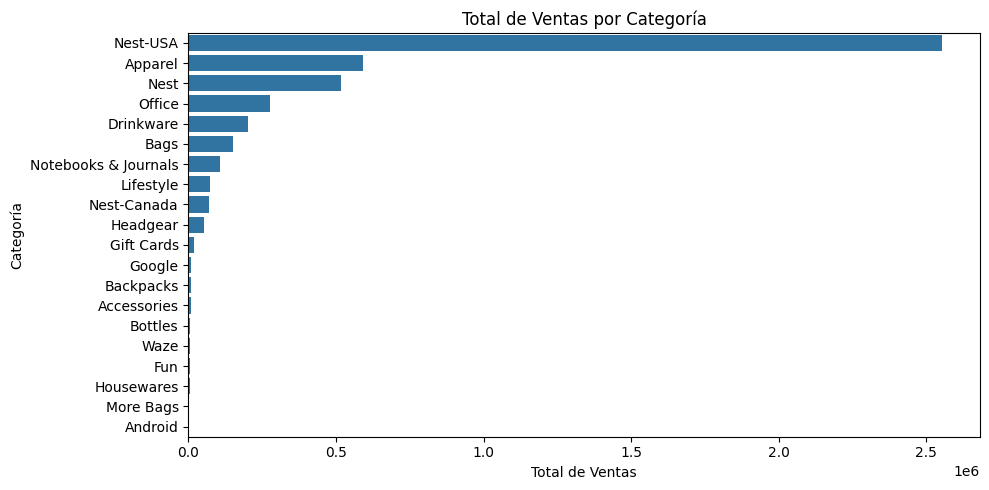

In [ ]:
# Añadir columna total por transacción
Ventas["Total_sales"] = Ventas["Quantity"] * Ventas["Avg_Price"]

# --- 1. Total de ventas por categoría ---
sales_by_category = Ventas.groupby("Product_Category")["Total_sales"].sum().sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=sales_by_category.values, y=sales_by_category.index)
plt.title("Total de Ventas por Categoría")
plt.xlabel("Total de Ventas")
plt.ylabel("Categoría")
plt.tight_layout()
plt.show()

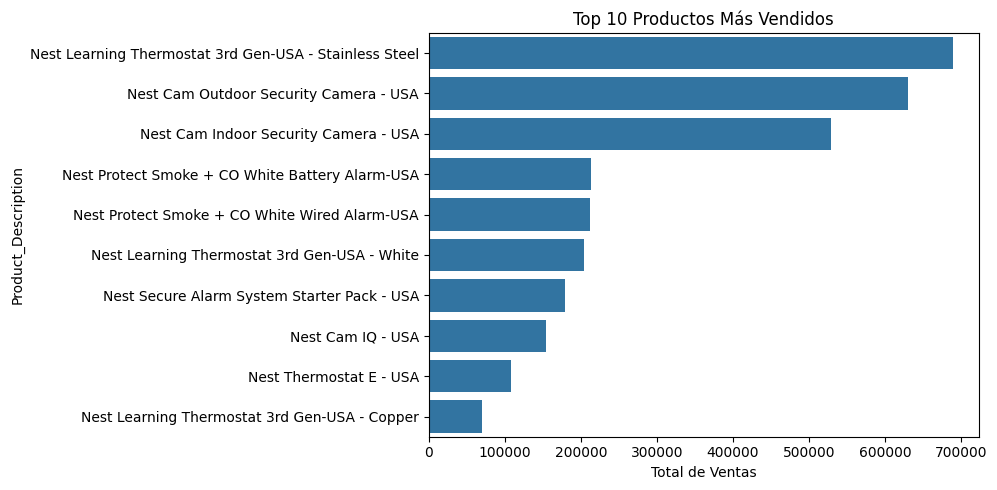

In [ ]:
# --- 2. Total de ventas por producto ---
Ventas_por_producto = Ventas.groupby("Product_Description")["Total_sales"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=Ventas_por_producto.values, y=Ventas_por_producto.index)
plt.title("Top 10 Productos Más Vendidos")
plt.xlabel("Total de Ventas")
plt.tight_layout()
plt.show()

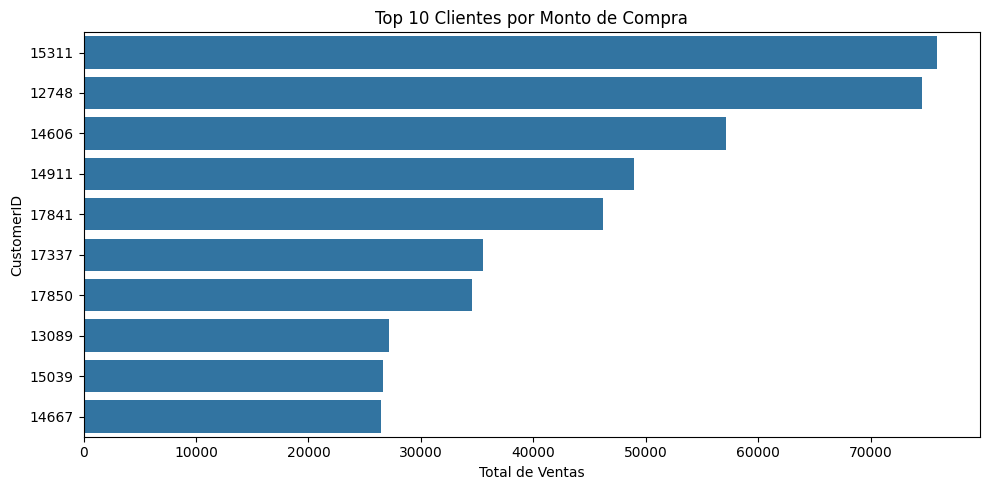

In [ ]:
# --- 3. Total de ventas por cliente ---
ventas_por_cliente = Ventas.groupby("CustomerID")["Total_sales"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=ventas_por_cliente.values, y=ventas_por_cliente.index.astype(str))
plt.title("Top 10 Clientes por Monto de Compra")
plt.xlabel("Total de Ventas")
plt.tight_layout()
plt.show()

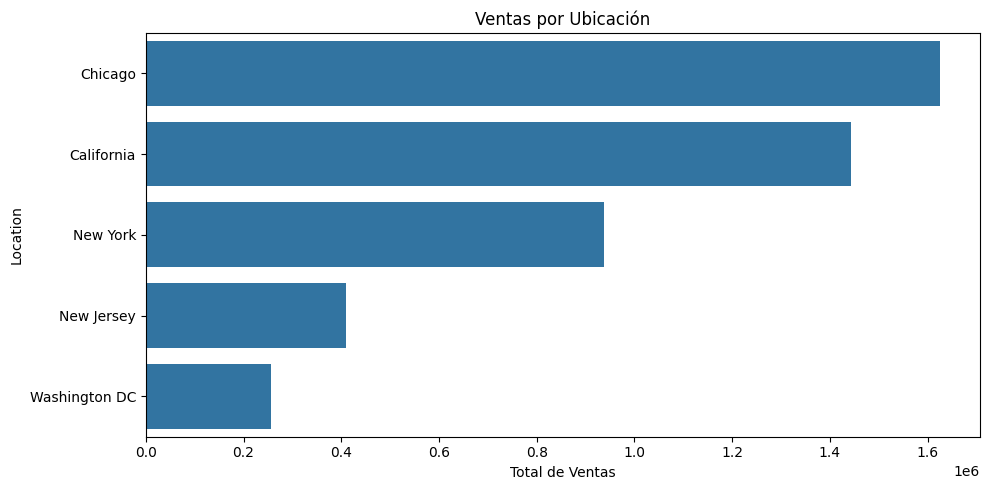

In [ ]:
# --- 4. Total de ventas por ubicación ---
function = Ventas.merge(Cliente, on="CustomerID")
ventas_por_ubicación = function.groupby("Location")["Total_sales"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=ventas_por_ubicación.values, y=ventas_por_ubicación.index)
plt.title("Ventas por Ubicación")
plt.xlabel("Total de Ventas")
plt.tight_layout()
plt.show()

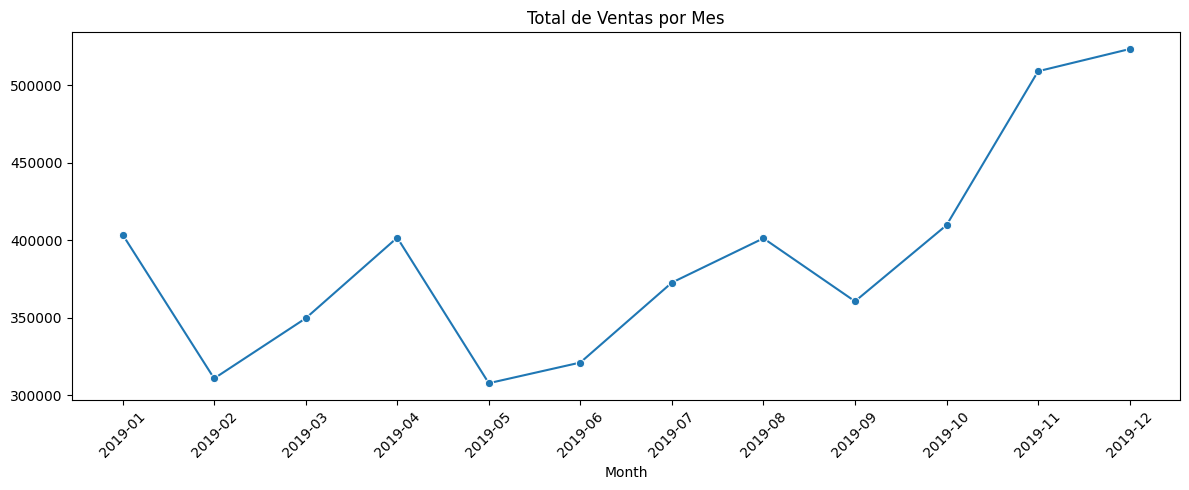

In [ ]:
# --- 5. Ventas por mes ---
Ventas["Transaction_Date"] = pd.to_datetime(Ventas["Transaction_Date"])
Ventas["Month"] = Ventas["Transaction_Date"].dt.to_period("M").astype(str)

sales_by_month = Ventas.groupby("Month")["Total_sales"].sum()
plt.figure(figsize=(12,5))
sns.lineplot(x=sales_by_month.index, y=sales_by_month.values, marker="o")
plt.title("Total de Ventas por Mes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()